# **기온 데이터를 활용하여 지구온난화 시각화하기**

## 1. 프로젝트 목적 및 정의

지구온난화는 실제로 진행되고 있는걸까요? 실제로 진행되고 있다면 왜 그런 걸까요?   
데이터 분석의 즐거움은 데이터만으로도 관련 문제를 직접 탐구하고 결론을 내리는 것이 가능하다는 것에서 찾을 수 있습니다.   
여러분들이 직접 지구온난화가 진행되는지 한번 확인해보는건 어떨까요?
  

## 2. 데이터셋 불러오기

파일을 불러온 뒤, 해당 파일의 처음 8개 열을 읽어봅시다.
* 파일은 `temperatureByCountry.csv`라는 이름을 가졌습니다.
* `pd.read_csv(파일 경로)`를 사용하면 파일을 읽어올 수 있습니다.
* `df.head(n)`을 사용하면 첫 n개의 열을 읽어올 수 있습니다.

In [ ]:
import pandas as pd
df = pd.read_csv('temperatureByCountry.csv')  # temperatureByCountry.csv파일을 읽어와 df에 저장합니다.
df.head(8)  # 파일의 첫 8개의 열을 읽어옵니다. 

## 3. 데이터 분석 및 시각화

### 3.1. 범주형과 수치형 구분하기
읽어온 데이터에는 3가지 column `year`, `country`, `average_temperature`가 있습니다. 각 column에 해당하는 데이터의 속성은 무엇일까요?   
수치형과 범주형 중 둘중 하나를 골라 답해봅시다.
* 수치형 데이터는 관측된 값이 수치로, 즉 숫자로 표현되는 데이터입니다.
* 범주형 데이터는 관측된 값이 몇개의 범주 혹은 항목으로 표현되는 데이터입니다.

* year: 연도를 나타내므로 수치형 데이터입니다.
* country: 나라를 나타내므로 범주형 데이터입니다.
* average_temprature: 평균온도를 나타내므로 수치형 데이터입니다.

### 3.2. 범주형 데이터에서 고유한 값 가져오기
불러온 데이터는 나라별 연간 평균온도에 관한 데이터입니다. 이 데이터에는 얼마나 많은 나라가 들어있을까요?   
아래 함수를 사용해 데이터로부터 고유한 나라의 배열과 그 갯수를 출력해보세요.
* `df["column 이름"].unique()` 함수를 사용하면 column에 존재하는 고유값들을 가져올 수 있다.
* `len(x)`를 사용하면 x의 길이를 가져올 수 있다.

In [ ]:
unique_country = df['country'].unique()  # 파일의 'country' 열에 존재하는 고유값을 가져와 저장합니다. 
print(unique_country)
print(len(unique_country))  # 고유값의 개수(시퀀스의 길이)를 출력합니다. 

### 3.3. 특정한 값을 가지는 데이터 가져오기
나라 리스트를 보면 대한민국도 찾아볼 수 있습니다. 대한민국의 연간 평균 온도변화를 관찰하기 위해 관련 데이터를 가져와볼까요?
* 대한민국을 나라로 가지는 데이터 열을 가져옵니다.
* 해당 데이터에서 대한민국의 나라 이름은 `'South Korea'`입니다.
* `df[df[<column 이름>] == 값]`을 사용하면 그 열이 해당 값인 모든 행을 가져올 수 있습니다.

In [ ]:
df[df['country'] == 'South Korea']  # 'country'열에서 값이 'South Korea'인 모든 행을 가져옵니다. 

### 3.4. 선그래프 그리기
가져온 데이터를 시각화 해볼까요? 우리는 연도에 따른 온도의 변화를 보고 싶으므로 선그래프를 그려줄 겁니다.
아래의 함수를 사용해서 그려봅시다.
* `sns.lineplot(data = df, x = x축에 올 column 이름, y = y축에 올 column 이름)`
    * 주어진 데이터로부터 x축과 y축으로 한 선그래프를 그려줄거에요

In [ ]:
''' 주어진 코드
import seaborn as sns
'''
import seaborn as sns

korea_df = df[df['country'] == 'South Korea']  # 앞서 출력해봤던 대한민국의 데이터를 korea_df에 저장해줍니다.
sns.lineplot(data = korea_df, x = 'year', y = 'average_temperature')  # korea_df 데이터의 연도와 평균 온도 열을 각각 x축, y축으로 한 선 그래프를 그립니다. 

### 3.5. 가장 높은값 찾기
대한민국의 연간 평균온도 중 가장 높은 값을 찾고, 그 해의 연도를 찾아주세요.
* `df["column 이름"].max()` 함수를 사용하면 column의 최대값을 출력할 수 있습니다.
* `df[df[<column 이름>] == 값]`을 사용하면 그 열이 해당 값인 모든 행을 가져올 수 있습니다.

In [ ]:
korea_max_temperature = korea_df['average_temperature'].max()  # 평균 온도의 최대값을 korea_max_temperature에 저장해줍니다. 

korea_df[korea_df['average_temperature'] == korea_max_temperature]  # average_temperature열에서 korea_max_temperature에 저장된 값과 동일한 값이 있는 행을 가져옵니다. 

### 3.6. 여러 범주의 데이터 안에 있는 데이터 찾기
3.3에서는 한국이라는 하나의 나라에 대해서만 데이터를 가져왔습니다. 이번에는 여러 나라의 데이터를 가져와보겠습니다. 아래의 함수를 사용해서 원하는 나라의 배열 안에 존재하는 데이터를 가져와주세요.
* `df[df[<column 이름>].isin(<배열>)]`를 사용하면 배열 안에 있는 원소 중 하나를 column의 값으로 같은 모든 데이터를 가져올 수 있습니다.

In [ ]:
countries = ['South Korea', 'Russia', 'United States', 'Niger', 'Greenland', 'Australia', 'Bolivia']  # 원하는 나라의 배열을 만들어줍니다.
df_in_countries = df[df['country'].isin(countries)]  # 'country' 열에서 배열의 원소들과 동일한 값들을 찾고, 해당 행들의 모든 데이터를 가져와 저장해줍니다.   

### 3.7. 여러 범주의 데이터 시각화하기
3.4에서는 한국이라는 하나의 나라에 대해서만 선그래프를 그려봤습니다. 이번에는 여러 나라의 데이터를 그래프로 표현해보겠습니다.   
아래의 함수를 사용하면 각 나라의 온도 변화를 선그래프로 그려볼 수 있습니다.
* `sns.lineplot(data = df, x = <x축에 올 column 이름>, y = <y축에 올 column 이름>, hue = <데이터끼리 구분할 column 이름>)`
    * 대한민국의 선그래프를 그렸던 함수와 동일합니다. 이 함수를 이용하여 주어진 데이터로부터 x축과 y축으로 한 선그래프를 그려주겠습니다.
    * 앞서와 달리 `hue`라는 입력이 추가됐습니다. 해당 column의 값들에 따라 선그래프의 색이 다르게 나타납니다. 
    * `hue`를 사용하면 데이터를 구분하고 시각화에도 도움을 줄 수 있어요.
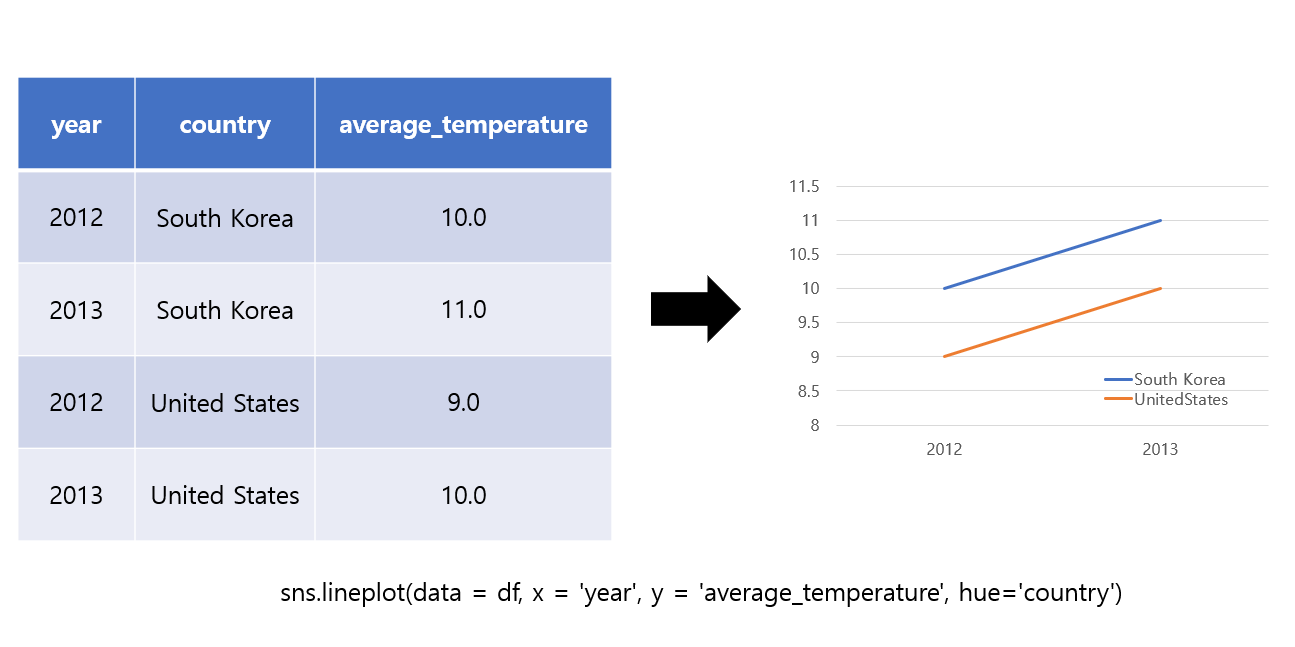

In [ ]:
sns.lineplot(data = df_in_countries, x = 'year', y = 'average_temperature', hue='country')

## 4. 마무리

### 4.1. 결론
해당 데이터 분석 실습을 하면서 느끼거나 관찰한 점들을 적어보아요!

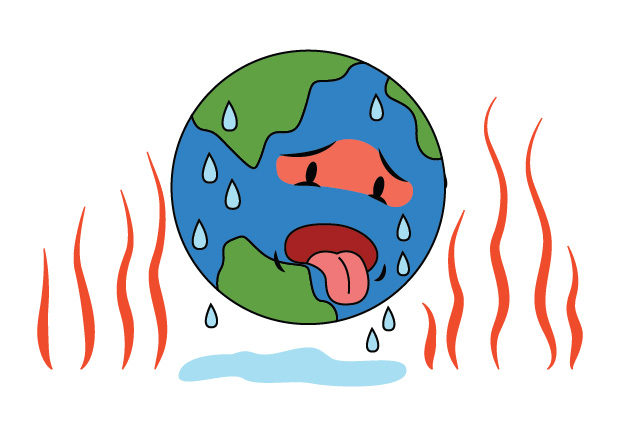

예시
* 나라 하나만을 가지고 온도 변화를 보면 온도가 상승하고 있음을 알 수 있다.   
* 하지만 여러 나라의 온도변화를 관찰하면 그래프의 온도 범위가 너무 커져서 변화를 잘 관찰할 수 없다.